In [7]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

In [2]:
df = pd.read_excel("Cleansing the data/result clean data.xlsx")

In [5]:
df_clean = df[~df["Case:"].isin([4,5])].copy()
df_clean = df[df['Metric:'] == 'PxVar'].reset_index(drop=True)

In [6]:
df_clean

,predicted_id,New_Audit_id,Audit_ID,Facility_ID,Status,Auditor1,Auditor2,Auditor3,Au date,Manuf,...,Rev.,Metric:,Case:,Depth:,Energy:,Energy_FFF :,Gantry:,Mode:,Unidentified_column :,predictedValue
0,289713_1_PxVar|2|10|6|0|0|1|NA,289713_1,289713,Whispered Okapi,NaN,NaN,NaN,NaN,2013-03-22,Healthy Crocodile,...,1.0,PxVar,2,10,6.0,0.0,0,1,NaN,-0.011864
1,289713_1_PxVar|3|10|6|0|0|1|NA,289713_1,289713,Whispered Okapi,NaN,NaN,NaN,NaN,2013-03-22,Healthy Crocodile,...,1.0,PxVar,3,10,6.0,0.0,0,1,NaN,-0.008924
2,289713_1_PxVar|4|15|NA|NA|0|1|NA,289713_1,289713,Whispered Okapi,NaN,NaN,NaN,NaN,2013-03-22,Healthy Crocodile,...,1.0,PxVar,4,15,NaN,NaN,0,1,NaN,-0.013807
3,289713_1_PxVar|4|8|NA|NA|0|1|NA,289713_1,289713,Whispered Okapi,NaN,NaN,NaN,NaN,2013-03-22,Healthy Crocodile,...,1.0,PxVar,4,8,NaN,NaN,0,1,NaN,-0.011913
4,289713_1_PxVar|5|15|NA|NA|0|1|NA,289713_1,289713,Whispered Okapi,NaN,NaN,NaN,NaN,2013-03-22,Healthy Crocodile,...,1.0,PxVar,5,15,NaN,NaN,0,1,NaN,-0.013800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6902,368829_2_PxVar|9|8|10|1|0|1|NA,368829_2,368829,Klutzy English Cocker Spaniel,NaN,Big Lemming,Oval Penguin,NaN,2023-02-14,Healthy Crocodile,...,1.0,PxVar,9,8,10.0,1.0,0,1,NaN,-0.001000
6903,368829_2_PxVar|10|15|6|0|0|1|NA,368829_2,368829,Klutzy English Cocker Spaniel,NaN,Big Lemming,Oval Penguin,NaN,2023-02-14,Healthy Crocodile,...,1.0,PxVar,10,15,6.0,0.0,0,1,NaN,-0.004000
6904,368829_2_PxVar|10|8|6|0|0|1|NA,368829_2,368829,Klutzy English Cocker Spaniel,NaN,Big Lemming,Oval Penguin,NaN,2023-02-14,Healthy Crocodile,...,1.0,PxVar,10,8,6.0,0.0,0,1,NaN,0.003000
6905,368829_2_PxVar|10|15|10|0|0|1|NA,368829_2,368829,Klutzy English Cocker Spaniel,NaN,Big Lemming,Oval Penguin,NaN,2023-02-14,Healthy Crocodile,...,1.0,PxVar,10,15,10.0,0.0,0,1,NaN,0.005000


<AxesSubplot:title={'center':'Correlation Heatmap'}>

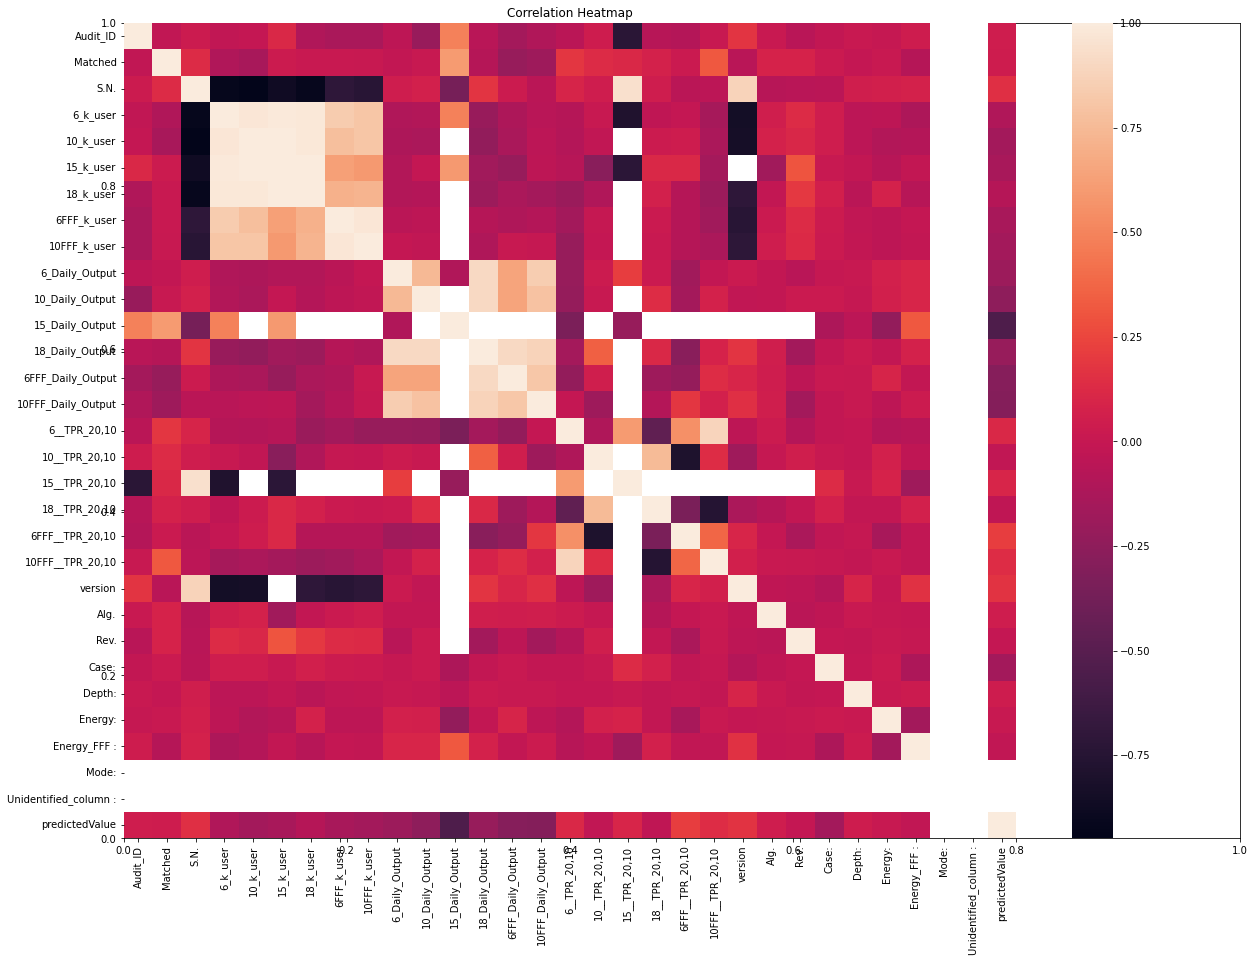

In [13]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
pcorr = df_clean.corr(method = 'pearson')
sns.heatmap(pcorr, 
            xticklabels=pcorr.columns.values,
            yticklabels=pcorr.columns.values)


In [14]:
Xs = np.column_stack((df_clean['Depth:'], df_clean['Energy:'], df_clean['Energy_FFF :'], df_clean['Mode:'], ))
y = df_clean['predictedValue']
c = sm.add_constant(Xs)
est1 = sm.OLS(y, c, missing="drop")
est2 = est1.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         predictedValue   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     16.73
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           8.01e-11
Time:                        11:25:32   Log-Likelihood:                 18127.
No. Observations:                6157   AIC:                        -3.625e+04
Df Residuals:                    6153   BIC:                        -3.622e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0003   4.46e-05      6.819      0.0

In [15]:
model = ols('predictedValue ~ Facility_ID', data=df_clean).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

                 df    sum_sq   mean_sq          F         PR(>F)
Facility_ID   162.0  0.427733  0.002640  10.532618  8.857854e-223
Residual     6744.0  1.690593  0.000251        NaN            NaN


In [18]:
model = ols('predictedValue ~ TPS', data=df_clean).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

               df        sum_sq        mean_sq       F        PR(>F)
TPS           4.0  1.603736e+06  400933.890238  9.4391  1.267634e-07
Residual  41974.0  1.782882e+09   42475.861917     NaN           NaN


In [19]:
model = ols('predictedValue ~ Algorithm', data=df_clean).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

                df        sum_sq        mean_sq         F    PR(>F)
Algorithm      7.0  1.585856e+06  226550.909120  5.333204  0.000004
Residual   41971.0  1.782900e+09   42479.323993       NaN       NaN


In [20]:
model = ols('predictedValue ~ Model', data=df_clean).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

               df        sum_sq        mean_sq         F        PR(>F)
Model        15.0  3.374553e+06  224970.212879  5.300301  8.834492e-11
Residual  41963.0  1.781111e+09   42444.796856       NaN           NaN
